In [30]:
from py_auc import AUC
from py_auc import Score_generator

import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [2]:
s = Score_generator()

In [8]:
s.set0('gaussian', 0, 1, 100000)
s.set1('gaussian', 2, 1, 100000)

AUC (area under the ROC curve):    0.921
AUPRC (area under the PRC curve):    0.922


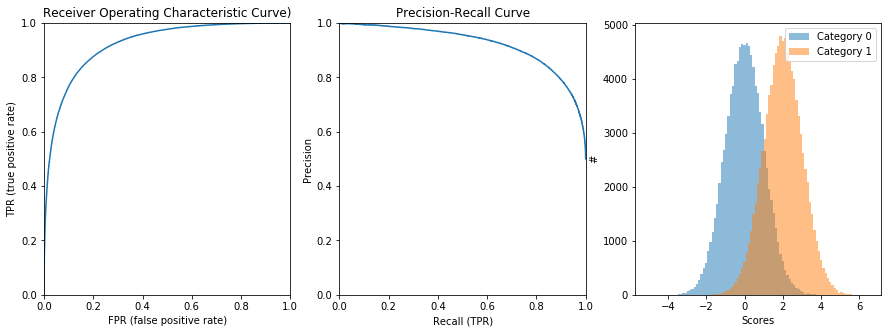

In [11]:
a = AUC(s.get_asDataFrame())
a.plot_ROC()

In [12]:
a.cal_auc_rank(measure_time=True)

--- 0.07950687408447266 seconds ---


0.9214984894999982

In [16]:
b = AUC(s.get_randomSample(10000))

In [17]:
b.cal_auc_rank(measure_time=True)

--- 0.008664608001708984 seconds ---


0.9192163387444439

In [18]:
b.cal_auc_sklearn(measure_time=True)

--- 0.010220527648925781 seconds ---


0.9192163387444446

## Convergence check

In [42]:
Population = 100000
SampleN = np.arange(1000, Population-1000, 1000)
AvrN = 5

In [43]:
s = Score_generator()
s.set0('gaussian', 0, 1, int(0.5*Population))
s.set1('gaussian', 3, 1, int(0.5*Population))

In [44]:
a = AUC(s.get_asDataFrame())
auc = a.cal_auc_rank()
print('... auc: {}'.format(auc))

... auc: 0.9831025284000008


100%|██████████| 98/98 [00:26<00:00,  2.06it/s]


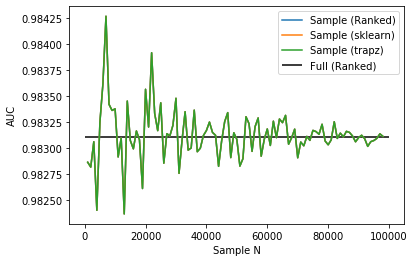

In [45]:
aucs_r = []
aucs_t = []
aucs_s = []

for n in tqdm.tqdm(SampleN):
    bs = [ AUC(s.get_randomSample(n)) for i in range(AvrN) ]
    auc_r = [ b.cal_auc_rank() for b in bs ]
    aucs_r.append(np.mean(auc_r))
    
    auc_t = [ b.cal_auc_trapz() for b in bs ]
    aucs_t.append(np.mean(auc_t))

    auc_s = [ b.cal_auc_sklearn() for b in bs ]
    aucs_s.append(np.mean(auc_s))
    
plt.plot(SampleN, aucs_r, label='Sample (Ranked)')
plt.plot(SampleN, aucs_s, label='Sample (sklearn)')
plt.plot(SampleN, aucs_t, label='Sample (trapz)')
plt.hlines(auc, 0, Population, label='Full (Ranked)')

plt.xlabel('Sample N')
plt.ylabel('AUC')
plt.legend()

In [28]:
auc

0.9207481955999979